<h1 style="color:blue; text-align:center;">Decision Tree</h1>


<h2>Load the Preprocessed Dataset</h2>

In [1]:
import pandas as pd
df = pd.read_csv("../Dataset/after_preprocessing.csv")
df

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,0.439024,1,0.24,2,0.455873,0,0,0,0.25,1,...,0.166667,1,0,0.158730,0,0,0,3,2,1
1,0.414634,1,0.12,0,0.223615,2,0,0,0.25,1,...,0.666667,0,1,0.198413,0,0,0,2,0,0
2,0.780488,1,0.12,0,0.291965,1,0,0,0.75,1,...,0.333333,2,1,0.587302,0,0,1,2,1,1
3,0.975610,1,0.86,3,0.288079,1,3,2,0.00,1,...,0.666667,0,1,0.746032,0,0,0,3,1,0
4,0.512195,1,0.46,0,0.226362,2,0,0,0.00,1,...,1.000000,1,0,0.341270,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73910,0.780488,0,0.22,0,0.213630,1,0,0,0.25,1,...,0.333333,2,2,0.261905,0,0,1,3,3,0
73911,0.000000,1,0.06,2,0.456611,1,0,2,0.75,0,...,0.000000,2,1,0.563492,0,0,0,1,2,0
73912,0.097561,0,0.26,4,0.450178,1,0,2,0.00,1,...,0.333333,0,2,0.214286,0,1,0,2,2,1
73913,0.121951,1,0.14,0,0.114253,1,3,0,0.00,0,...,0.000000,0,0,0.055556,0,0,0,2,1,0


<h2>Split the Dataset into Training and Testing Sets</h2>

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((59132, 22), (59132,), (14783, 22), (14783,))

<h2>Train a Decision Tree Classifier</h2>

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt_classifier = DecisionTreeClassifier(random_state=42)

In [5]:
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
y_pred.shape

(14783,)

<h2>Evaluate the Decision Tree Classifier</h2>

In [6]:
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')

Accuracy: 66.31%
Confusion Matrix:


In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
TP = conf_matrix[1,1]

print("True Negative:",TN)
print("Flase Postive:",FP)
print("Flase Negative:",FN)
print("True Postive:",TP)

[[4537 2434]
 [2547 5265]]
True Negative: 4537
Flase Postive: 2434
Flase Negative: 2547
True Postive: 5265


In [8]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.65      0.65      6971
           1       0.68      0.67      0.68      7812

    accuracy                           0.66     14783
   macro avg       0.66      0.66      0.66     14783
weighted avg       0.66      0.66      0.66     14783



<h2>Visualize the Decision Tree</h2>

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

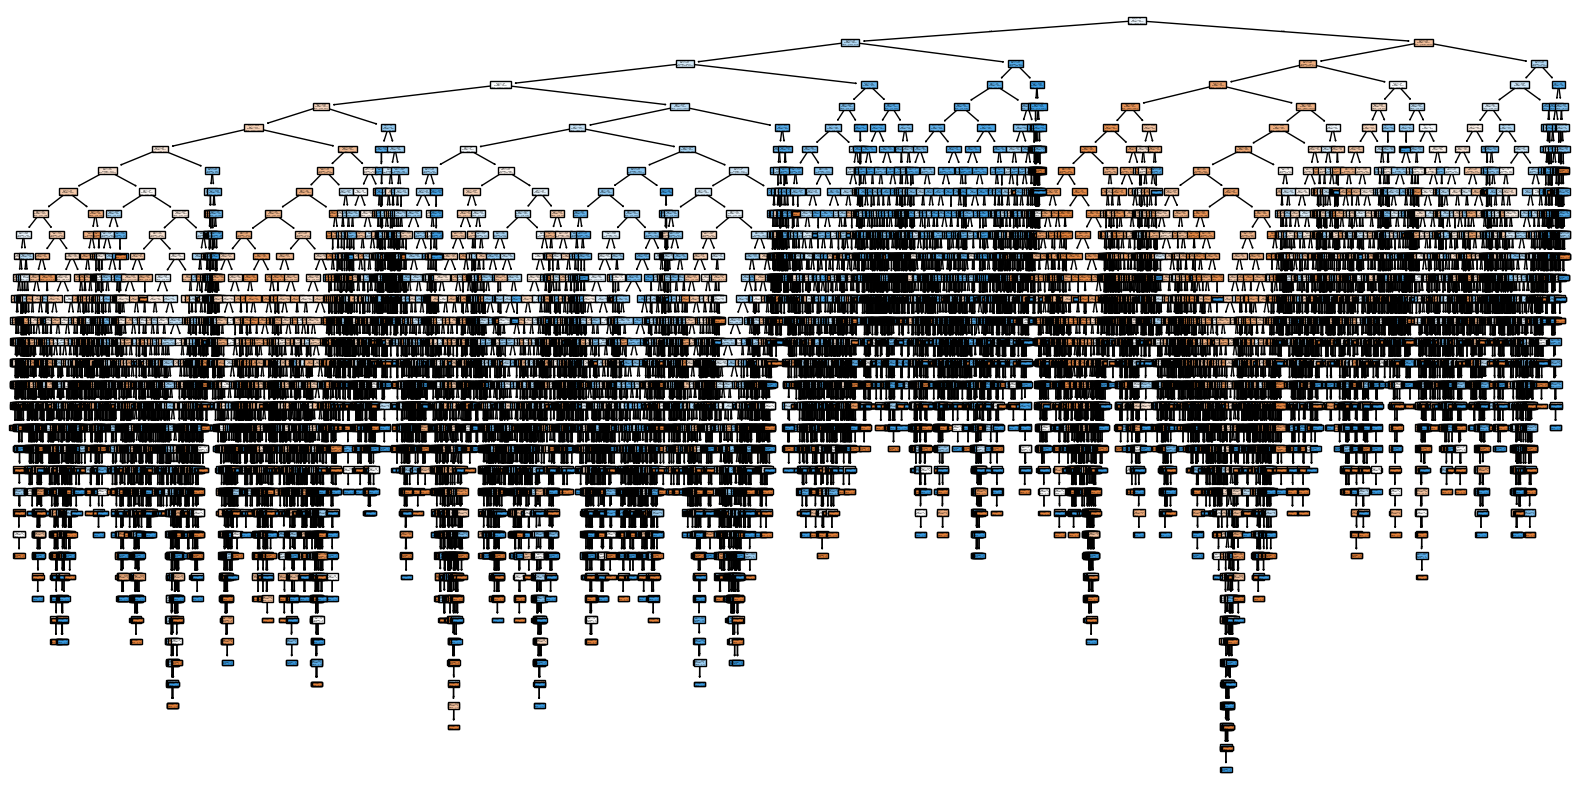

In [10]:
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True)
plt.show()

<h2>Train a Decision Tree Classifier with Entropy Criterion</h2>

In [11]:
dt_classifier2 = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier2.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [12]:
y_pred2 = dt_classifier2.predict(X_test)
y_pred2

array([1, 1, 1, ..., 0, 1, 0], shape=(14783,))

In [13]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65      6971
           1       0.69      0.69      0.69      7812

    accuracy                           0.67     14783
   macro avg       0.67      0.67      0.67     14783
weighted avg       0.67      0.67      0.67     14783

